#Jupyter Notebook Crush Course
[(Credit to this online tutorial)](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)
##What is Jupyter Notebook?
It's a web broswer based application that allows you to present formatted(Markdown) texts and code with inline running results. It has two primary components: the Cell and Kernal. Cell refers to each visual block displayed in the browser that either represents a paragraph of texts or excutable code. Kernal is the computation engine used to execute and output the executable code in the cells. In our case, Kernal is the specific python.exe installed on your local machine. It allows easy text/picture editting and enables audience to run codes in real time to see the results. 

##Launch Jupyter Notebook
* Download the example code from [link](Add The link you would like to have the code on, probably somewhere on physics department server)
* Open Anaconda on your local machine, [install](https://docs.anaconda.com/anaconda/install/) it if you have not yet
* Click on the Jupyter Notebook logo. It should automatically opens the default web-browser showing the Jupyter Dashboard.
* Navigate the folders to where the example code is stored on your local machine
* click on the "PartitionFunctionSimulation.ipynb"

##Run the program and See Results in Real Time
* Select the block of code you would like to run and click on it. It should be highlighted with green or blue.
* Press shortcut ctlr+enter or using menu: Cell->Run Cell
* The results will be updated in the blank below
* (Please Note: you should run the first block as the set-up code each time you start a new session or restart the current session)

##Reset the state and output of the computing scripts behind
* using menu: Kernal -> Restart & Clear output

##other useful commands:
1. Run and Show results above and below current block:
   Menu: Cell -> Run Above/Run Below
2. Change the Python you would like to use to run the script
   Menu: Kernal -> Change Kernal



In [1]:
#Initial Set up Code that you should run first before using any of the following blocks
%matplotlib inline
from PFSimulation import *
graph = True

#Simple Harmonic Oscillator
#class SimpleHarmonicOscillatorPF
Calculate partition functions and related quantities of a 1-D simple harmonic oscillator by summation of each partition function terms and plot the result in comparsion with analytical solutions.

* Partion Function
Temperature Range:100-300k, number of terms in summation conducted:10e4

Base PF takes second:0.7710330486297607


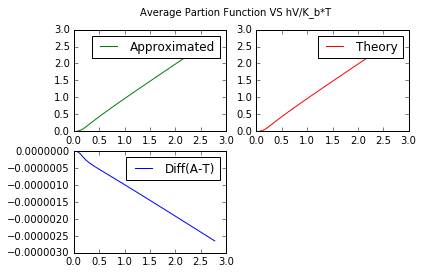

In [2]:

sho1d = SimpleHarmonicOscillator();
summationTermCount = 1e5
PFsho = sho1d.PF([10,400],graph=graph,interval = 50,maxn = summationTermCount);

* U: Average Energy

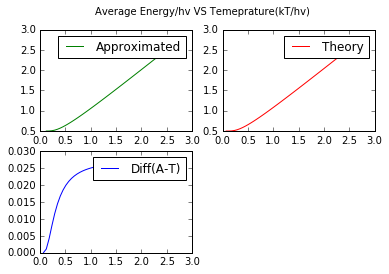

In [3]:
sho1d.AE = sho1d.AE(PFsho);

* F: Free Energy

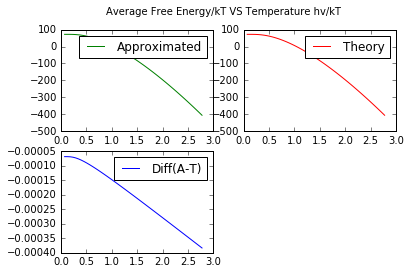

In [4]:
 sho1d.FE(PF=PFsho,graph=graph);


 * S: Entropy 

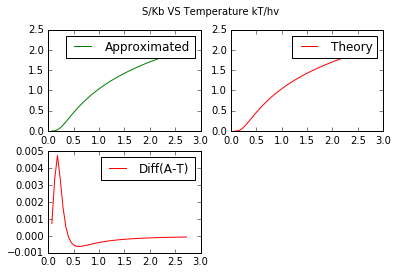

In [5]:
 sho1d.Entropy();

#Diatomic Gas
#class diatomicPF
This class calculates the parition function and relevant properties of diatomic gas particles described in textbook Sturge, 5.12 part(f).

*Diatomic Gas
use diatomic constant of carbon dioxide as the default value

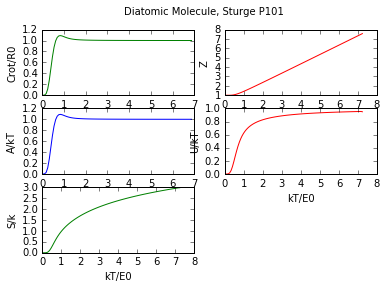

In [6]:

diatomicCO = diatomicPF()
diatomicCO.PF([0.1,20]);

# Generic Functions
##Generic Partition Function
Function Interface:
'''
def PF_Generic(tmpRange,energyGenerator,interval = 100,maxn = 1e5,xValue = None, nlm = None)
    #Input
        #tmpRange: array of temperature limits,[lowerTemperatureLimit, upperTemperature limit]
        #energyGenerator: a function returns the current energy value for a specific state based on n,l,m quantum numbers. it should be able to handle all n,l,m number if needed. Otherwise single iteration of n is assumed
        #nlm: array of quantum numbers,[n,l,m]
        #maxn: maximum number of iterations
    
    #output
       #array containing value of [temperature array, partion function array]
       #No graph is plotted as this is intended for computation only
'''

Below is an example usage with Simple Harmonic Oscillator's Energy spectrum


In [7]:
exampleFreq = 3e12
def SMHEnergyGenerator(n):
    return (n+1/2)*HETA*exampleFreq*2*np.pi
[T_GE,PF_GE] = PF_Generic([10,100],SMHEnergyGenerator,interval = 100,maxn = 1e5)

##Generic Free Energy(A),Internal Energy(U) and Entropy (S)
[Continuation of the block above]

In [8]:
#Free Energy
[T_GE,A_GE] = FE_Generic(T_GE,PF_GE)
#Internal Energy
[T_GE,U_GE] = U_Generic(T_GE,PF_GE)
#EntropyB
[T_GE,S_GE] = S_Generic(T_GE,A_GE)

#Reference and Infos:
* Code Repository: https://github.com/BeichenZ/Statistical-Mechanics-Visualization
* Simple Harmonic Oscillator and Generic Functions: 
                              403 Lecture Notes Chapter 4/5
                              http://www.nyu.edu/classes/tuckerman/stat.mech/lectures/lecture_13/node8.html
                              https://www-thphys.physics.ox.ac.uk/people/AlexanderSchekochihin/A1/2011/handout6.pdf
* Diatomics: 
                              http://faculty.washington.edu/gdrobny/Lecture453_20-15-molecular-partition.pdf                                          https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Map%3A_Physical_Chemistry_(McQuarrie_and_Simon)/18%3A_Partition_Functions_and_Ideal_Gases/18.6%3A_Rotational_Partition_Functions_of_Diatomic_Gases
                              